In [1]:
!date

Tue Jun 17 07:41:49 PM EDT 2025


In [2]:
pwd

'/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code'

In [3]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import ants
from tqdm import tqdm
import warnings

In [4]:
import ants

In [5]:
from nilearn import plotting
from nilearn.glm.first_level import FirstLevelModel

In [6]:
def run_contrast(func_imgs,
                 events_tsv,
                 confounds_tsv,
                 contrast_vec,
                 ofn):
    
    first_level_model = FirstLevelModel(
    t_r=1.5,                   # replace with your TR
    slice_time_ref=0.5,        # reference slice (0–1)
    hrf_model='spm',           # canonical SPM HRF
    drift_model='cosine',
    high_pass=0.01,            # cutoff (Hz)
    noise_model='ar1',
    smoothing_fwhm=6.0,        # in mm
    signal_scaling=False,
    standardize=True,
    verbose=1)
    
    first_level_model = first_level_model.fit(
    run_imgs=func_imgs,
    events=events_tsv,
    confounds=None)
    
    dm = first_level_model.design_matrices_[0]
    print(dm.columns) 
    
    z_map = first_level_model.compute_contrast(contrast_vec,stat_type='t',output_type='stat')
    
    
    display = plotting.plot_stat_map(
    z_map,
    threshold=3.1,
    display_mode='ortho',
    cut_coords=None, #(0, -52, 8),
    title=ofn.split('/')[-1])
    plotting.show()
    
    z_map.to_filename(ofn)

In [7]:
indir = '../Data/things/fmriprep2'

In [8]:
deepcor_dir = '../Data/things/deepcor_outputs/'
analysis_name = 'DeepCor-things-v2'
analysis_dir = os.path.join(deepcor_dir,analysis_name)
analysis_dir

'../Data/things/deepcor_outputs/DeepCor-things-v2'

In [9]:
# kinds = ['preproc','compcor','signal']
# k = 2
# kind = kinds[k]

In [21]:
subs = ['sub-01','sub-02','sub-03']
s = 1
sub = subs[s]
sess_name = 'ses-localizer2' if sub=='sub-01' else 'ses-localizer1'

In [22]:
#contrast_vec = np.array([-1,5,-1,-1,-1,-1,0,0,0,0])
contrast_vec = np.array([-1,-1,-1,5,-1,-1,0,0,0,0])

Computing run 1 out of 6 runs (go take a coffee, a big one)
Computing run 2 out of 6 runs (62 seconds remaining)
Computing run 3 out of 6 runs (50 seconds remaining)
Computing run 4 out of 6 runs (37 seconds remaining)
Computing run 5 out of 6 runs (25 seconds remaining)
Computing run 6 out of 6 runs (12 seconds remaining)

Computation of 6 runs done in 75.71092867851257 seconds.

<ipython-input-6-e7a08dd824d9>:27: UserWarning: One contrast given, assuming it for all 6 runs
  z_map = first_level_model.compute_contrast(contrast_vec,stat_type='t',output_type='stat')
/home/aglinska/anaconda3/lib/python3.8/site-packages/nilearn/glm/contrasts.py:108: UserWarning: t contrasts should be of length P=12, but it has length 10. The rest of the contrast was padded with zeros.
  reg = regression_result[label_].Tcontrast(con_val)


Index(['bodyparts', 'faces', 'objects', 'scenes', 'scrambled', 'words',
       'drift_1', 'drift_2', 'drift_3', 'drift_4', 'drift_5', 'constant'],
      dtype='object')


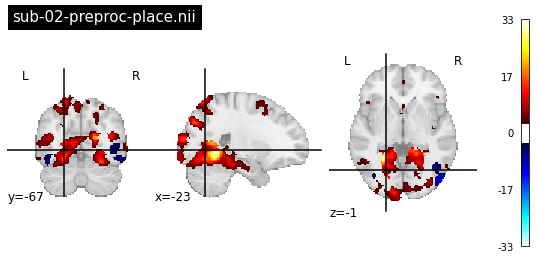

In [23]:
func_imgs = []
events_tsv = []
confounds_tsv = []
for r in [1,2,3,4,5,6]:
    epi_fn = os.path.join(analysis_dir,f'preproc_S{s}_R{r}.nii.gz')
    conf_fn = os.path.join(indir,sub,sess_name,'func',f'{sub}_{sess_name}_task-6cat_run-01_desc-confounds_timeseries.tsv')
    events_fn = f'../Data/things/ds004192/{sub}/{sess_name}/func/{sub}_{sess_name}_task-6cat_run-{r:02d}_events.tsv'

    assert os.path.exists(epi_fn), 'epi_fn does not exist'
    assert os.path.exists(conf_fn), f'conf_fn does not exist:\n{conf_fn}'
    assert os.path.exists(events_fn), f'events_fn does not exist:\n{events_fn}'
    
    func_imgs.append(epi_fn)
    events_tsv.append(events_fn)
    confounds_tsv.append(conf_fn)
    
    
run_contrast(func_imgs,
                 events_tsv,
                 confounds_tsv,
                 contrast_vec,
                 f'../Data/things/GLM/{sub}-preproc-place.nii')

Computing run 1 out of 6 runs (go take a coffee, a big one)
Computing run 2 out of 6 runs (63 seconds remaining)
Computing run 3 out of 6 runs (50 seconds remaining)
Computing run 4 out of 6 runs (37 seconds remaining)
Computing run 5 out of 6 runs (25 seconds remaining)
Computing run 6 out of 6 runs (12 seconds remaining)

Computation of 6 runs done in 75.33191776275635 seconds.

<ipython-input-6-e7a08dd824d9>:27: UserWarning: One contrast given, assuming it for all 6 runs
  z_map = first_level_model.compute_contrast(contrast_vec,stat_type='t',output_type='stat')
/home/aglinska/anaconda3/lib/python3.8/site-packages/nilearn/glm/contrasts.py:108: UserWarning: t contrasts should be of length P=12, but it has length 10. The rest of the contrast was padded with zeros.
  reg = regression_result[label_].Tcontrast(con_val)


Index(['bodyparts', 'faces', 'objects', 'scenes', 'scrambled', 'words',
       'drift_1', 'drift_2', 'drift_3', 'drift_4', 'drift_5', 'constant'],
      dtype='object')


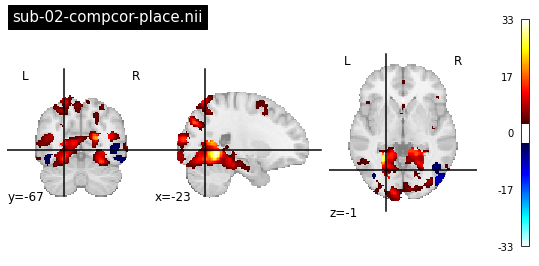

In [24]:
func_imgs = []
events_tsv = []
confounds_tsv = []
for r in [1,2,3,4,5,6]:
    epi_fn = os.path.join(analysis_dir,f'compcor_S{s}_R{r}.nii.gz')
    conf_fn = os.path.join(indir,sub,sess_name,'func',f'{sub}_{sess_name}_task-6cat_run-01_desc-confounds_timeseries.tsv')
    events_fn = f'../Data/things/ds004192/{sub}/{sess_name}/func/{sub}_{sess_name}_task-6cat_run-{r:02d}_events.tsv'

    assert os.path.exists(epi_fn), 'epi_fn does not exist'
    assert os.path.exists(conf_fn), f'conf_fn does not exist:\n{conf_fn}'
    assert os.path.exists(events_fn), f'events_fn does not exist:\n{events_fn}'
    
    func_imgs.append(epi_fn)
    events_tsv.append(events_fn)
    confounds_tsv.append(conf_fn)
    
    
run_contrast(func_imgs,
                 events_tsv,
                 confounds_tsv,
                 contrast_vec,
                 f'../Data/things/GLM/{sub}-compcor-place.nii')

Computing run 1 out of 6 runs (go take a coffee, a big one)
Computing run 2 out of 6 runs (82 seconds remaining)
Computing run 3 out of 6 runs (66 seconds remaining)
Computing run 4 out of 6 runs (50 seconds remaining)
Computing run 5 out of 6 runs (33 seconds remaining)
Computing run 6 out of 6 runs (17 seconds remaining)

Computation of 6 runs done in 102.58726692199707 seconds.

<ipython-input-6-e7a08dd824d9>:27: UserWarning: One contrast given, assuming it for all 6 runs
  z_map = first_level_model.compute_contrast(contrast_vec,stat_type='t',output_type='stat')
/home/aglinska/anaconda3/lib/python3.8/site-packages/nilearn/glm/contrasts.py:108: UserWarning: t contrasts should be of length P=12, but it has length 10. The rest of the contrast was padded with zeros.
  reg = regression_result[label_].Tcontrast(con_val)


Index(['bodyparts', 'faces', 'objects', 'scenes', 'scrambled', 'words',
       'drift_1', 'drift_2', 'drift_3', 'drift_4', 'drift_5', 'constant'],
      dtype='object')


/home/aglinska/anaconda3/lib/python3.8/site-packages/nilearn/glm/_utils.py:205: RuntimeWarning: divide by zero encountered in true_divide
  return np.where(X <= 0, 0, 1.0 / X)


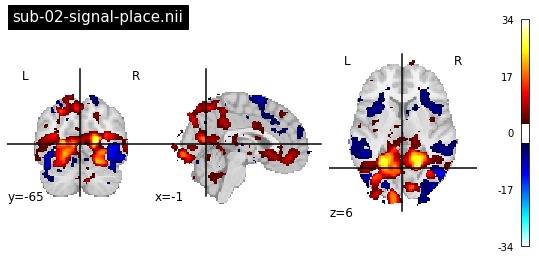

In [25]:
func_imgs = []
events_tsv = []
confounds_tsv = []
for r in [1,2,3,4,5,6]:
    epi_fn = os.path.join(analysis_dir,f'signal_S{s}_R{r}_avg.nii.gz')
    conf_fn = os.path.join(indir,sub,sess_name,'func',f'{sub}_{sess_name}_task-6cat_run-01_desc-confounds_timeseries.tsv')
    events_fn = f'../Data/things/ds004192/{sub}/{sess_name}/func/{sub}_{sess_name}_task-6cat_run-{r:02d}_events.tsv'

    assert os.path.exists(epi_fn), 'epi_fn does not exist'
    assert os.path.exists(conf_fn), f'conf_fn does not exist:\n{conf_fn}'
    assert os.path.exists(events_fn), f'events_fn does not exist:\n{events_fn}'
    
    func_imgs.append(epi_fn)
    events_tsv.append(events_fn)
    confounds_tsv.append(conf_fn)
    
run_contrast(func_imgs,
                 events_tsv,
                 confounds_tsv,
                 contrast_vec,
                 f'../Data/things/GLM/{sub}-signal-place.nii')